<a href="https://colab.research.google.com/github/ashish19950830/ashish19950830/blob/main/Titanic_survival_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
file_path = '/content/train.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# data overview and understanding

In [3]:
# data summary to get idea of data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#statstical summary to check columns statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# checking missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# since age is a crutial factor we will fill the missing values
df["Age"].fillna(df["Age"].median() , inplace = True)


In [7]:
# we drop Cabin column
df.drop(columns = ["Cabin"] , inplace=  True)


In [8]:
# now we verify the data again
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# we drop embarked column

df.drop(columns = ["Embarked"] , inplace=  True)

In [10]:
# now we will do data cleaning
# find weather data has some missing values

df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


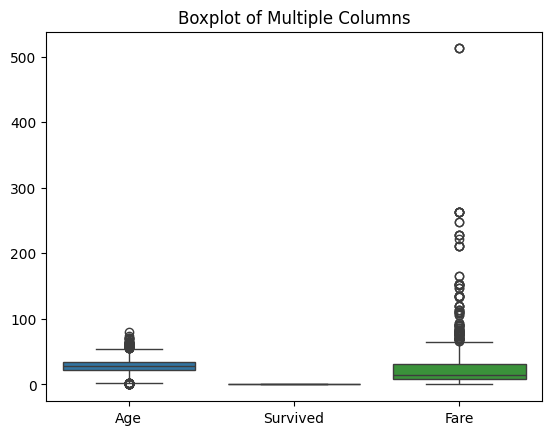

In [11]:
# since there is no duplicates now we will see if there is any outliers using Boxplot

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data = df[["Age" , "Survived" , "Fare"]])
plt.title("Boxplot of Multiple Columns")
plt.show()


In [12]:
# here in age column median line lies just in middle which indicates distribution is symmetric
#also data is mostly confined wihin the whiskers however there is some outliers which shows ages of some passengers where
# either very less or very high
# there is no box plot of survived column whbich shows it has mostly binary or constant data
#when we inspect fare column we find that the median is on the lower end which indicates
# most passengers were travelling with a smaller fare value
#also many outliers can be seen in it which clearly indicates that some passengers were travelling
# with very high fare


In [13]:
# here we can handle these outliers in four diff ways
# 1 - removing the outliers
# 2 - caping the outlier using a upper limit
# 3 -transformimg the outliers
# 4 - treating the outliers seperately

In [14]:
# here we will move forward with caping  the outliers
import numpy as np
upper_limit = df["Fare"].quantile(0.95)
df["Fare"] = np.where(df["Fare"]> upper_limit , upper_limit , df["Fare"])

In [15]:
# now we will plot the box plot again to see the outliers got removed or not

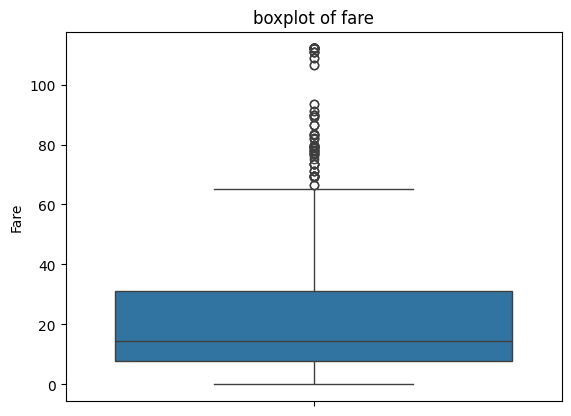

In [16]:
sns.boxplot(data = df["Fare"])
plt.title("boxplot of fare")
plt.show()

In [17]:
# now the distributions seems to be more controlled , here still we can find some outliers but it is within the caping range

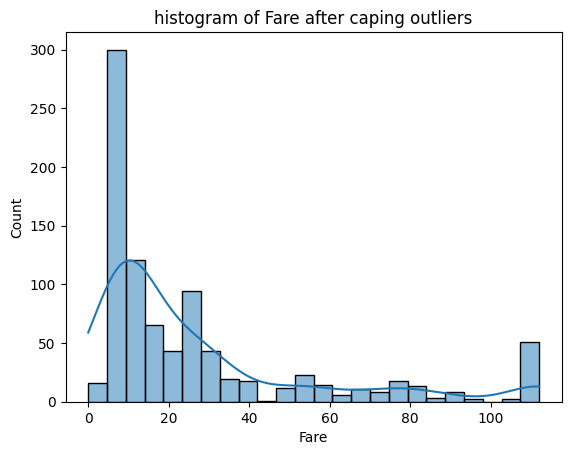

In [18]:
# now with help of ploting we will see the spread of column distribution after the transformation of data
# we can use histogram for this or kernal density estimate (kde)


sns.histplot(df["Fare"] , kde = True)
plt.title("histogram of Fare after caping outliers")
plt.show()

In [19]:
# now we willl conduct data transformation and normalisation to make it appropriate for data analysis or modeling

# we conduct log transformation on fare

df["Fare_log"] =np.log1p(df["Fare"]) # log (1+ Fare to handle zero values)



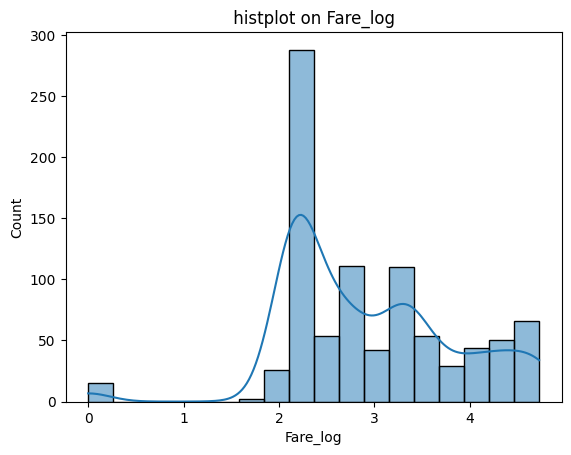

In [20]:
# now we will check the distribution again

sns.histplot(df["Fare_log"] , kde = True )
plt.title(" histplot on Fare_log ")
plt.show()


In [21]:
# this shows that the log transformation has sjown a positive efect
#it has reduce the positive skewness
#effect of high values has been compressed
# binomial distribution can be seen in our transformed data having two peaks , it is because of the two groups
# one of high fare an other of low fares
# now the distribution of our data is ready for perfoming linear or logistic reggression

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Fare_log     891 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB


In [23]:
# now we will conduct normalisation


from sklearn.preprocessing import StandardScaler
# since our data has outliers we will use standardscalerv method to normalise our data



In [24]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex       Age  \
0                              Braund, Mr. Owen Harris    male -0.565736   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.663861   
2                               Heikkinen, Miss. Laina  female -0.258337   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.433312   
4                             Allen, Mr. William Henry    male  0.433312   
..                                                 ...     ...       ...   
886        

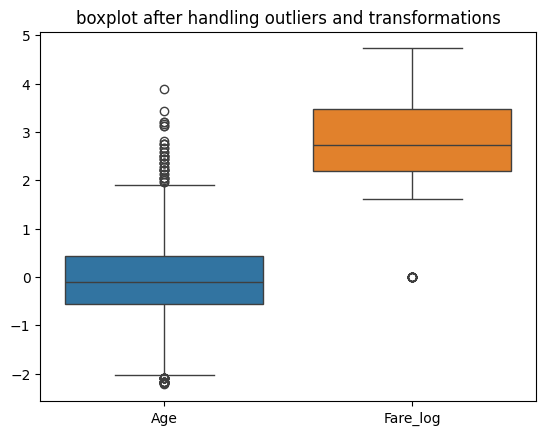

In [25]:
#now we do data anlysis and visualisation
# we first see hpw the distribution looks like after transformation

sns.boxplot(data = df[["Age" , "Fare_log"]])
plt.title("boxplot after handling outliers and transformations")
plt.show()

In [26]:
# now we will do correlation analysis
#correlation matrix

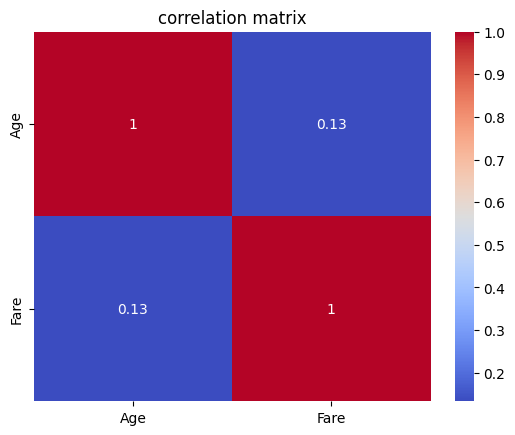

In [27]:
corr_matrix = df[['Age', 'Fare']].corr()
sns.heatmap(corr_matrix , annot = True , cmap = "coolwarm")
plt.title("correlation matrix")
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Fare_log     891 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB


In [29]:
# now we will build a machine learning model for this data

from sklearn.model_selection import train_test_split


In [30]:
# we define x and y

X = df[["Age" , "Fare_log"]] #features
y = df["Survived"]           # target variable

In [31]:
X_train , x_test , y_train , y_test = train_test_split(X , y , train_size = 0.70 , random_state = 100)

In [38]:
# now we do model training , and we will use logistic reggression here


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


In [34]:
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(x_test) # here we are predicting using test data set
print(f" Accuracy : {accuracy_score( y_test , y_pred)}") # heare we are checking the accuracy of the test data set

 Accuracy : 0.667910447761194


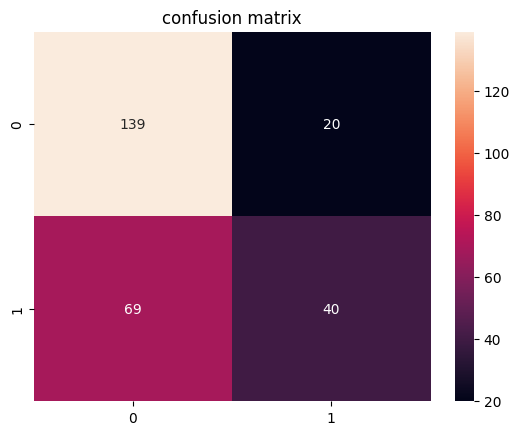

In [39]:
# confusion matrix


cm = confusion_matrix(y_test , y_pred)
sns.heatmap( cm , annot = True , fmt = "d") # fmt = "d" format decimal values into integer
plt.title("confusion matrix")
plt.show()

In [40]:
# we will print detailed report

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       159
           1       0.67      0.37      0.47       109

    accuracy                           0.67       268
   macro avg       0.67      0.62      0.62       268
weighted avg       0.67      0.67      0.64       268



In [ ]:
# precision = % of correct prediction , we have same precision for both class but its not so strong for p[ositive class]
#recall = number of actual instances predicted correctly , 0.37 is low which means model is missing some +ve insatances
# f1 score = harmonic mean of orecision an recall, its the balance measure of over all performance of model
#0.76 in 0 class is good but 0.37 in 1 class is less , so we need to improve the model
# support = total number of instances for each class in the data set
# accuracy 0.67 is over all good but it could misleading when class imbalance is high

In [ ]:
# so now we will try to improve our model by handling class imbalance



In [41]:
# first we will try to adjust weights in logistic regression

model = LogisticRegression(class_weight = "balanced")
model.fit(X_train , y_train)



LogisticRegression(class_weight='balanced')

In [42]:
y_pred = model.predict(x_test) # here we are predicting using test data set
print(f" Accuracy : {accuracy_score( y_test , y_pred)}") # heare we are checking the accuracy of the test data set

 Accuracy : 0.6753731343283582


In [43]:
# we can do cross validation so that we can rely on the report more

from sklearn.model_selection import cross_val_score
scores = cross_val_score( model , X , y , cv = 5 , scoring = "f1")
print(f"cross_validated f1 score:{scores}")


cross_validated f1 score:[0.43835616 0.57553957 0.59259259 0.67123288 0.625     ]


In [45]:
# we can also apply oversamplling and undersamplling

from sklearn.utils import resample

In [47]:
# we will prepare our data first dividing data into two classes survived =1 and not survived 0

df_minority = df[df["Survived"] == 1]
df_majority = df[df["Survived"] ==0]

In [54]:
# we will upsample minority class
df_minority_upsampled = resample(df_minority , replace = True , n_samples = len(df_majority) , random_state = 100)
# replace = true which means sampling is being done by replacements ie we can select row multiple times


In [49]:
# now we will combine unsampled data
df_upsampled = pd.concat([df_majority , df_minority_upsampled])

In [50]:
# now we have a balanced data set , which can train our model more efficiently
# now we perform feature and target seperation

X = df_upsampled[["Age" , "Fare"]]
y = df_upsampled["Survived"]


In [55]:
X_train , X_test , y_train , y_test = train_test_split( X, y , train_size = 0.70 , random_state = 100)


In [56]:
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [57]:
y_pred = model.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test , y_pred)}")


Accuracy : 0.6878787878787879


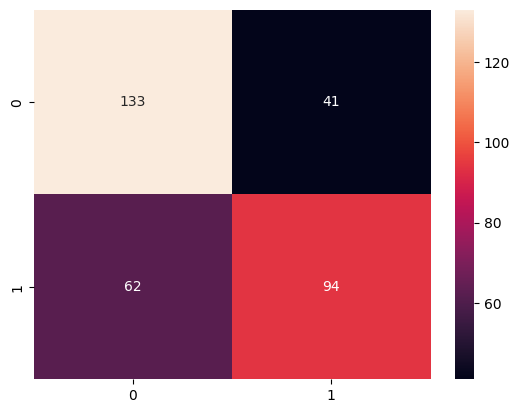

In [58]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot = True , fmt = "d")
plt.show()

In [60]:
print( classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       174
           1       0.70      0.60      0.65       156

    accuracy                           0.69       330
   macro avg       0.69      0.68      0.68       330
weighted avg       0.69      0.69      0.69       330



In [ ]:
# here we can find that the scores of the positive class has now been increased

In [ ]:
#Project Conclusion

Summary:

Objective: The analysis was conducted on the Titanic dataset with the primary goal of predicting who would survive based on the available features.

Data Preprocessing: The dataset was cleaned, missing values were handled, and feature engineering was performed, including a logarithmic transformation of the 'Fare' variable. The issue of class imbalance was addressed by upsampling the minority class.

Modeling: A Logistic Regression model was employed, with an initial accuracy of 0.68.

Evaluation: Various techniques were explored to improve the model's performance, and the evaluation was done using metrics like accuracy, confusion matrix, and classification report.

Conclusion: While the model performed reasonably well, further improvements could be made by employing more complex models such as Random Forest or Gradient Boosting, and by exploring more advanced feature engineering techniques.

